In [0]:
import mxnet as mx
from mxnet import nd, gluon
from mxnet.gluon.data.vision import transforms
import matplotlib.pyplot as plt

ctx = mx.gpu()

## __Downloading a random image from internet__

In [9]:
name = gluon.utils.download("https://images.pexels.com/photos/104827/cat-pet-animal-domestic-104827.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260")
name

'cat-pet-animal-domestic-104827.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260'

(2250, 3388, 3)

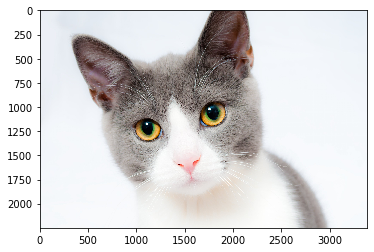

In [11]:
image = mx.image.imread(name, flag = 1) # flag = 1 for coloured rgb image with 3 channels, and flag = 0 for black and white image with only 1 channel
plt.imshow(image.asnumpy())
image.shape

## Defining the function that will apply augmentation and display the results

In [0]:
def augment(image, transforms):
    transformed = [transforms(image) for _ in range(4)]
    plt.figure(figsize = (5, 5))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(transformed[i].asnumpy())
        plt.axis('off')
        plt.title(transforms.__class__.__name__)
    plt.show()

## __Random Brightness Augmentation__

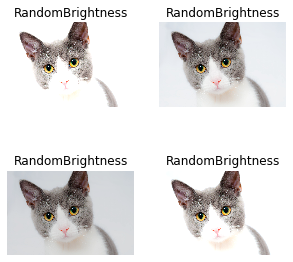

In [37]:
transform = transforms.RandomBrightness(brightness = 0.25)
augment(image, transform)

## __Random Color Jitter Augmentation__

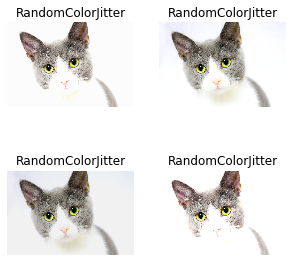

In [38]:
transform = transforms.RandomColorJitter(brightness = 0.25, contrast = 0.1, saturation = 0.1, hue = 0.1)
augment(image, transform)

## __Random Contrast Augmentation__

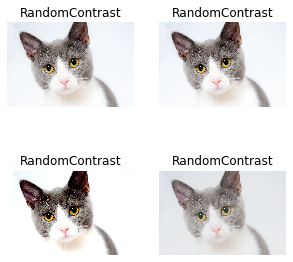

In [40]:
transform = transforms.RandomContrast(contrast = 0.5)
augment(image, transform)

## __Random Horizontal Flip Augmentation__

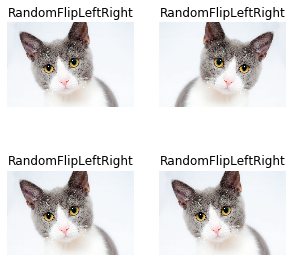

In [41]:
transform = transforms.RandomFlipLeftRight()
augment(image, transform)

## __Random Vertical Flip Augmentation__

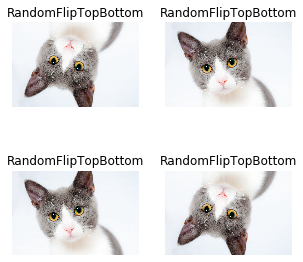

In [42]:
transform = transforms.RandomFlipTopBottom()
augment(image, transform)

## __Random Hue Augmentation__

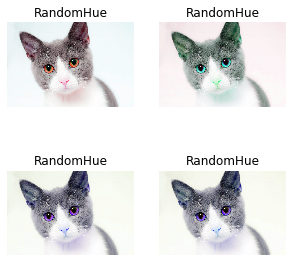

In [43]:
transform = transforms.RandomHue(hue = 0.5)
augment(image, transform)

## __Random Lightness Augmentation__

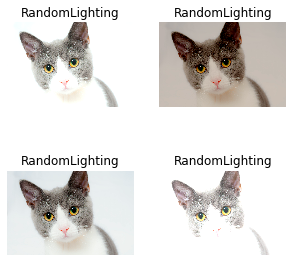

In [44]:
transform = transforms.RandomLighting(alpha = 1.5)
augment(image, transform)

## __Random Cropping Augmentation__

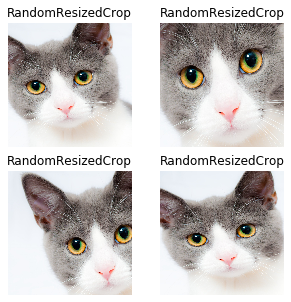

In [46]:
transform = transforms.RandomResizedCrop(size = 1800) # cropping image randomly with size of (1800, 1800)
augment(image, transform)

## __Random Saturation Augmentation__

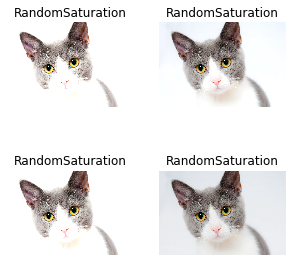

In [48]:
transform = transforms.RandomSaturation(saturation = 0.5)
augment(image, transform)

## __"NOT Random" Center Crop Augmentation__

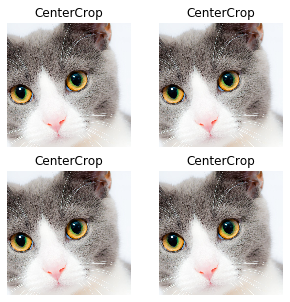

In [49]:
transform = transforms.CenterCrop(size = 1500)
augment(image, transform)

## __Resizing the Image__

Keep ratio true and interpolation 1


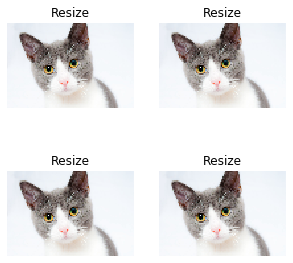

Keep ratio false and interpolation 1


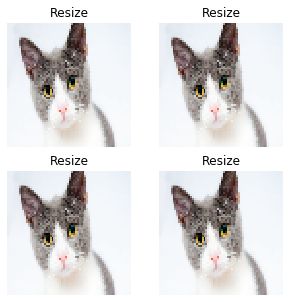

Keep ratio true and interpolation 3


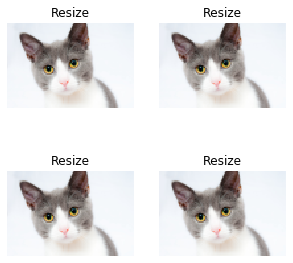

Keep ratio false and interpolation 3


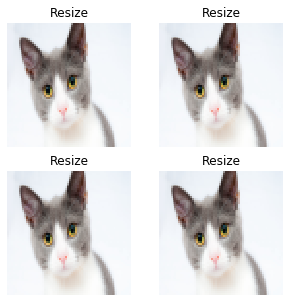

In [63]:
print('Keep ratio true and interpolation 1')
transform = transforms.Resize(size = 64, keep_ratio = True, interpolation = 1)
augment(image, transform)

print('Keep ratio false and interpolation 1')
transform = transforms.Resize(size = 64, keep_ratio = False, interpolation = 1)
augment(image, transform)

print('Keep ratio true and interpolation 3')
transform = transforms.Resize(size = 64, keep_ratio = True, interpolation = 3)
augment(image, transform)

print('Keep ratio false and interpolation 3')
transform = transforms.Resize(size = 64, keep_ratio = False, interpolation = 3)
augment(image, transform)

## __Using all available augmentations__

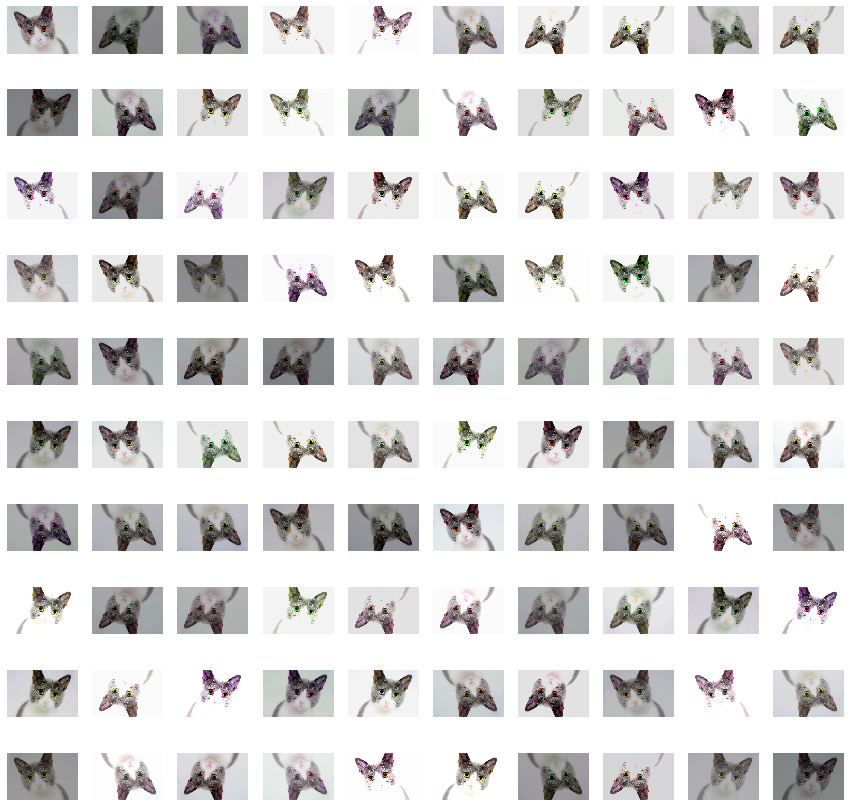

In [71]:
transform = transforms.Compose([transforms.RandomSaturation(saturation = 0.5),
                                transforms.RandomLighting(alpha = 0.2),
                                transforms.RandomHue(hue = 0.2),
                                transforms.RandomFlipTopBottom(),
                                transforms.RandomFlipLeftRight(),
                                transforms.RandomContrast(contrast = 0.2),
                                transforms.RandomColorJitter(brightness = 0.1, contrast = 0.1, saturation = 0.1, hue = 0.1)])

transformed = [transform(image) for _ in range(100)]
plt.figure(figsize = (15, 15))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(transformed[i].asnumpy())
    plt.axis('off')
plt.show()